# 4. 평균모멘텀 스코어 분산투자 전략(현금혼합)

In [1]:
import pandas as pd
import numpy as np

# Finance Library import
from Library import FinanceLibrary as fl

### csv 파일 읽어오기

In [2]:
import os
print (os.getcwd())

C:\DualMomentum\BackTesting


In [3]:
df = pd.read_csv("..\\Data\\KOSPI_Daily_1980data.csv", encoding="utf-8")

### Index는 datetime 형으로 변환하기

In [4]:
df.index = pd.to_datetime(df["Date"])
df.head()
# 시작하는 날짜 지정하기
#df = df["2016":]
df_close = df["Close"]
KOSPI = df_close/df_close[0]  #re-scale

In [5]:
# 일별 수익률
daily_return = fl.DailyReturn(KOSPI)  #KOSPI 수익률은 금일 청산/어제 진입
momentum_return = fl.MomentumDailyReturn(KOSPI)  # 모멘텀 수익률은 내일 청산/금일 진입

In [6]:
# KOSPI 누적수익률
KOSPI = np.cumprod(daily_return)

In [7]:
# 평균모멘텀 누적수익률
# 평균모멘텀 수익률 = 평균모멘텀스코어:1(현금), 평균모멘텀스코어/(평균모멘텀스코어+1(현금)):1-평균모멘텀스코어/(평균모멘텀스코어+1(현금))
average_score = fl.AverageMomentum(KOSPI,12)
# 현금비율 "1"로 유지하여  average_score/(average_score+1) 주식/전체 비율만큼 주식으로 진입
average_return = momentum_return * (average_score/(average_score+1))
# 현금비율 "1"로 유지하고 주식투자 비율외는 모두 현금으로 투입, 1-average_score/(average_score+1)
average_momentum = average_return + (1-average_score/(average_score+1))
average_momentum = np.cumprod(average_momentum)

In [8]:
average_return.plot(figsize=(16,4));

In [9]:
kospi = fl.Portfolio(KOSPI,"KOSPI")
average_momentum_cumprod = fl.Portfolio(average_momentum,"Average Momentum")
result = pd.concat([kospi,average_momentum_cumprod],axis=1)
pd.DataFrame(result).T

,Initial Balnce,Final Balance,CAGR,Std,Max.Drawdown,Sharpe Ratio
KOSPI,1.0015,21.242800,7.9354,6.7745,-75.4116,0.0272
Average Momentum,1.0000,9.608394,5.8196,3.1685,-22.0970,0.0481


### 그래프

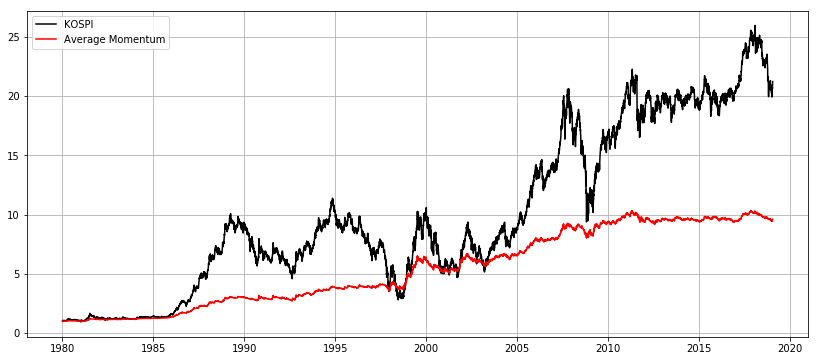

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,1,1)
ax.plot(KOSPI,color="Black",label="KOSPI");
ax.plot(average_momentum,color="Red",label="Average Momentum");
ax.legend()
ax.grid()